In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import Dataset
df = pd.read_csv('toyota.csv')

<Axes: >

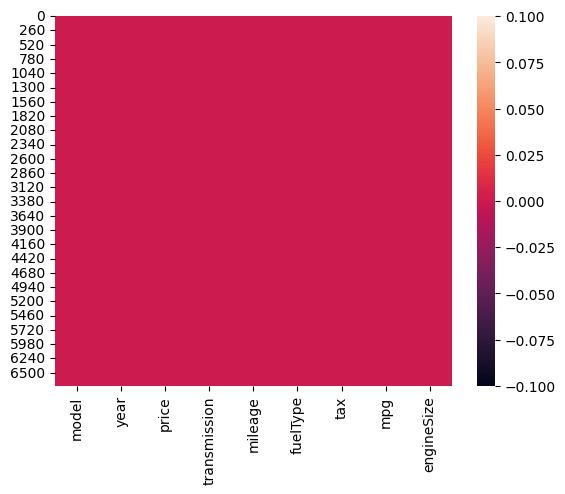

In [ ]:
sns.heatmap(df.isnull())

**EDA**

In [ ]:
# EDA
# Melihat baris pada dataframe
df.head()

model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0   GT86  2016  16000       Manual    24089   Petrol  265  36.2         2.0
1   GT86  2017  15995       Manual    18615   Petrol  145  36.2         2.0
2   GT86  2015  13998       Manual    27469   Petrol  265  36.2         2.0
3   GT86  2017  18998       Manual    14736   Petrol  150  36.2         2.0
4   GT86  2017  17498       Manual    36284   Petrol  145  36.2         2.0

In [ ]:
  # Merubah nama pada kolum
  df = df.rename(columns={"model": "model", "year": "tahun", "price":"harga",
                          "transmission": "transmisi", "mileage": "jarak tempuh", "fuelType": "jenisBahanBakar", "tax": "pajak", "mpg": "mpg", "engineSize": "ukuran mesin"})
  df.head()

model  tahun  harga transmisi  jarak tempuh jenisBahanBakar  pajak   mpg  \
0   GT86   2016  16000    Manual         24089          Petrol    265  36.2   
1   GT86   2017  15995    Manual         18615          Petrol    145  36.2   
2   GT86   2015  13998    Manual         27469          Petrol    265  36.2   
3   GT86   2017  18998    Manual         14736          Petrol    150  36.2   
4   GT86   2017  17498    Manual         36284          Petrol    145  36.2   

   ukuran mesin  
0           2.0  
1           2.0  
2           2.0  
3           2.0  
4           2.0

In [ ]:
# Untuk mengetahui jumlah kolom dan barisdari data
# Data kita mempunyai 9 kolom (features) dengan 6738 baris
df.shape

(6738, 9)

In [ ]:
# Mencari info dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   model            6738 non-null   object 
 1   tahun            6738 non-null   int64  
 2   harga            6738 non-null   int64  
 3   transmisi        6738 non-null   object 
 4   jarak tempuh     6738 non-null   int64  
 5   jenisBahanBakar  6738 non-null   object 
 6   pajak            6738 non-null   int64  
 7   mpg              6738 non-null   float64
 8   ukuran mesin     6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [ ]:
# menganalisis deskriptif terhadap satu variabel.
df.describe()

tahun         harga   jarak tempuh        pajak          mpg  \
count  6738.000000   6738.000000    6738.000000  6738.000000  6738.000000   
mean   2016.748145  12522.391066   22857.413921    94.697240    63.042223   
std       2.204062   6345.017587   19125.464147    73.880776    15.836710   
min    1998.000000    850.000000       2.000000     0.000000     2.800000   
25%    2016.000000   8290.000000    9446.000000     0.000000    55.400000   
50%    2017.000000  10795.000000   18513.000000   135.000000    62.800000   
75%    2018.000000  14995.000000   31063.750000   145.000000    69.000000   
max    2020.000000  59995.000000  174419.000000   565.000000   235.000000   

       ukuran mesin  
count   6738.000000  
mean       1.471297  
std        0.436159  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        1.800000  
max        4.500000

<ipython-input-103-6dc07220ba0e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

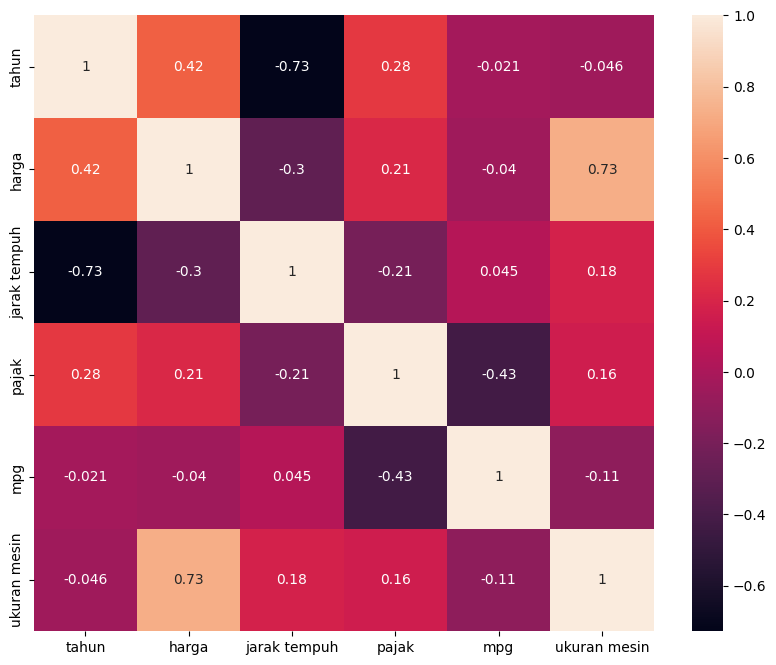

In [ ]:
# Visual Data
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [ ]:
models = df.groupby('model').count()[['pajak']].sort_values(by='pajak',ascending=True).reset_index()
models = models.rename(columns={'pajak':'numberOfCars'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Verso-S'),
  Text(1, 0, ' Urban Cruiser'),
  Text(2, 0, ' IQ'),
  Text(3, 0, ' Camry'),
  Text(4, 0, ' Supra'),
  Text(5, 0, ' PROACE VERSO'),
  Text(6, 0, ' Land Cruiser'),
  Text(7, 0, ' GT86'),
  Text(8, 0, ' Hilux'),
  Text(9, 0, ' Verso'),
  Text(10, 0, ' Avensis'),
  Text(11, 0, ' Prius'),
  Text(12, 0, ' Corolla'),
  Text(13, 0, ' RAV4'),
  Text(14, 0, ' C-HR'),
  Text(15, 0, ' Auris'),
  Text(16, 0, ' Aygo'),
  Text(17, 0, ' Yaris')])

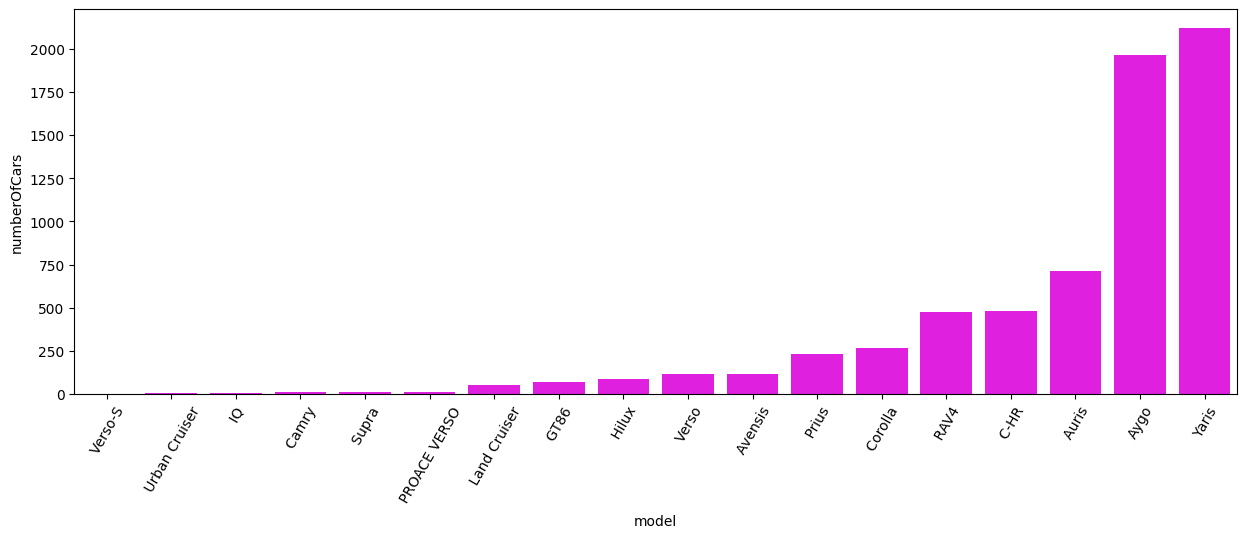

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models ['model'], y=models['numberOfCars'], color ='magenta')
plt.xticks(rotation=60)

In [ ]:
engine = df.groupby('ukuran mesin').count()[['pajak']].sort_values(by='pajak').reset_index()
engine = engine.rename(columns={'pajak':'count'})

<Axes: xlabel='ukuran mesin', ylabel='count'>

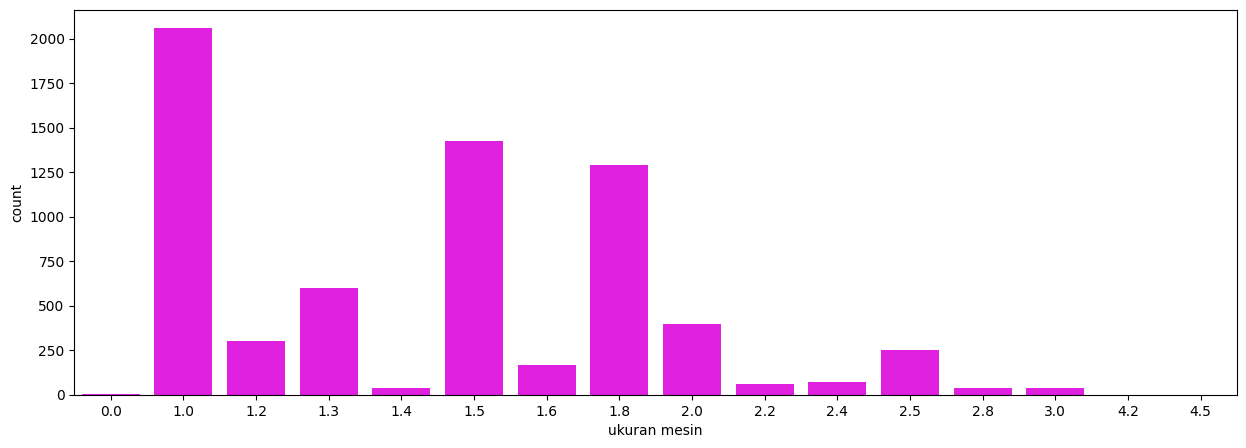

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['ukuran mesin'], y=engine['count'], color='magenta')

<ipython-input-69-f38d880640a6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['jarak tempuh'])


<Axes: xlabel='jarak tempuh', ylabel='Density'>

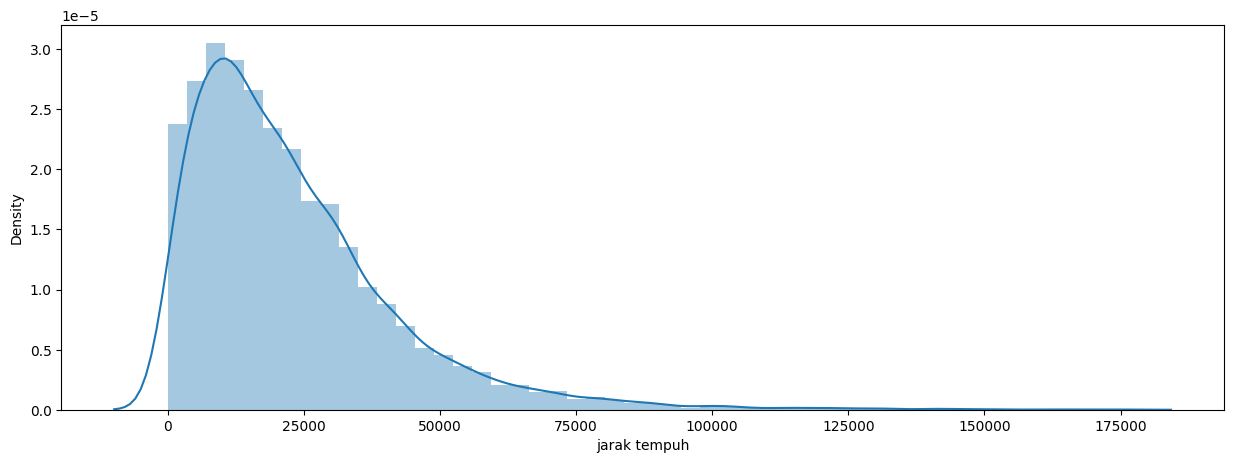

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(df['jarak tempuh'])

<ipython-input-70-c78d5d7ddb26>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['harga'])


<Axes: xlabel='harga', ylabel='Density'>

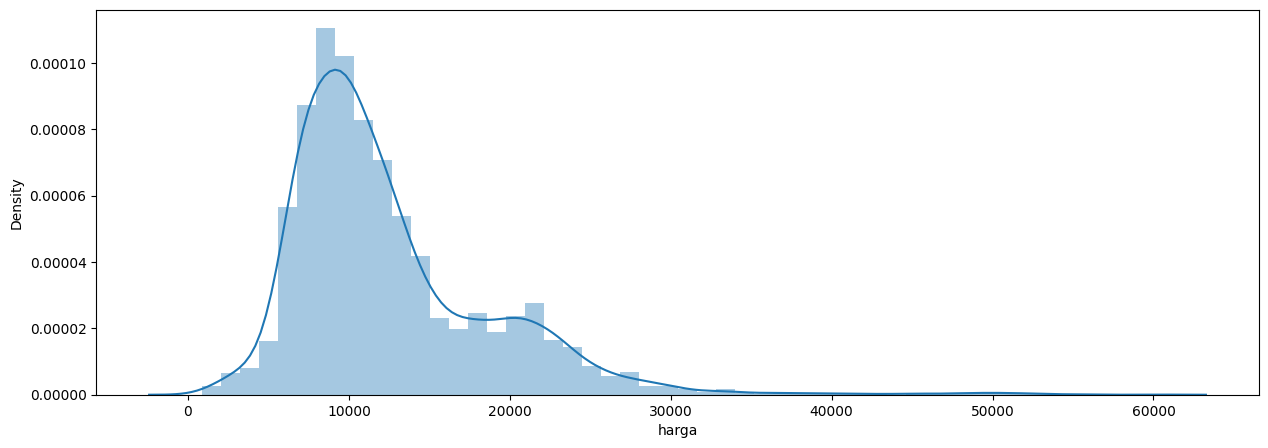

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(df['harga'])

<Figure size 1000x800 with 0 Axes>

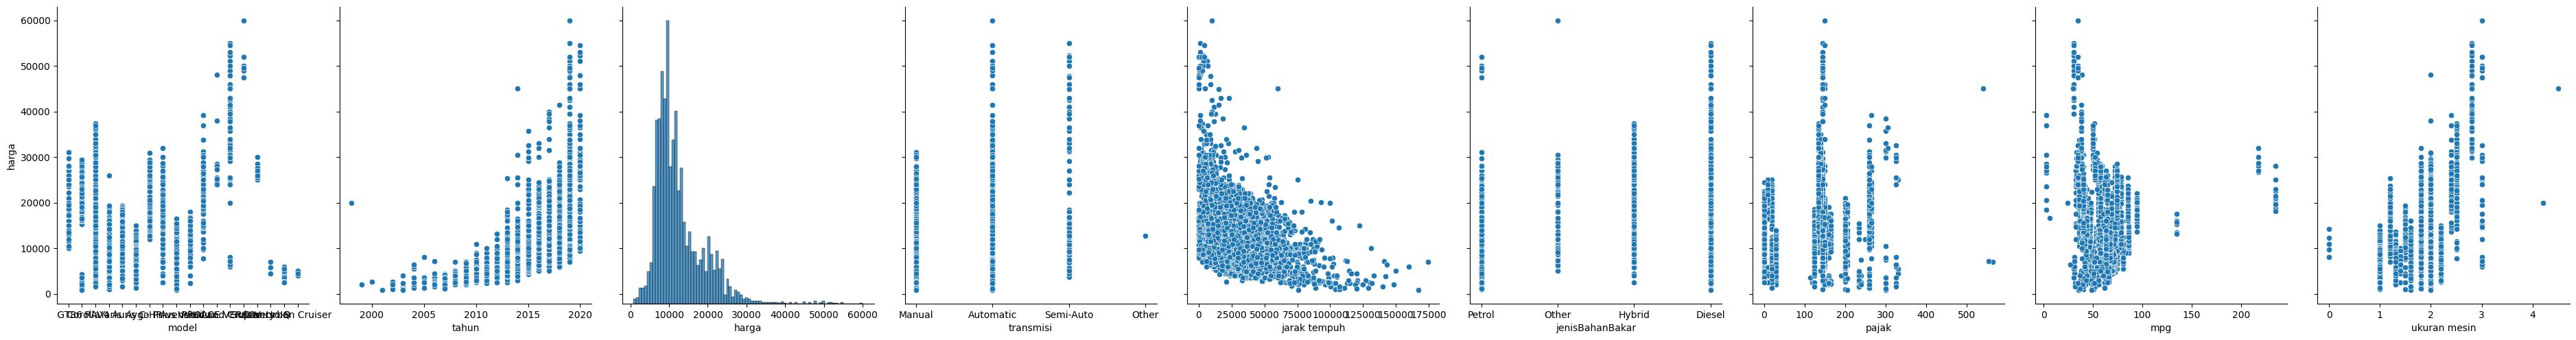

In [ ]:
# Melihat hubungan antara independent variable dan dependent variable
# Menggunakan pairplot
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['model', 'tahun', 'harga', 'transmisi', 'jarak tempuh', 'jenisBahanBakar', 'pajak', 'mpg', 'ukuran mesin'],
                      y_vars=['harga'], height=5, aspect=0.85)
plt.show()

**PREPROCESING**

In [ ]:
# Recall data kita
df.head()

model  tahun  harga transmisi  jarak tempuh jenisBahanBakar  pajak   mpg  \
0   GT86   2016  16000    Manual         24089          Petrol    265  36.2   
1   GT86   2017  15995    Manual         18615          Petrol    145  36.2   
2   GT86   2015  13998    Manual         27469          Petrol    265  36.2   
3   GT86   2017  18998    Manual         14736          Petrol    150  36.2   
4   GT86   2017  17498    Manual         36284          Petrol    145  36.2   

   ukuran mesin  
0           2.0  
1           2.0  
2           2.0  
3           2.0  
4           2.0

In [ ]:
 # Pertama, buat variabel x dan y
 X = df.drop(columns='harga')
 y = df['harga']

In [ ]:
# Kedua, kita split data kita menjadi data training dan data testing dengan perbandingan 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
# Cek shape dari data training dan testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5390, 8)
(5390,)
(1348, 8)
(1348,)


**IMPLEMENTATION**

In [ ]:
features = ['tahun', 'jarak tempuh', 'pajak', 'mpg', 'ukuran mesin']
x = df[features]
y = df ['harga']
x.shape, y.shape

((6738, 5), (6738,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y, random_state=70)
y_test.shape

(1685,)

**EVALUASI/AKURASI**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict (X_test)

In [ ]:
score = lr.score(X_test, y_test)
print ('Akurasi model Regresi Linier adalah', score)

Akurasi model Regresi Linier adalah 0.7678983314475207


In [ ]:
input_data = np.array([[2019,5000,145,30.2,2]])
prediction = lr.predict(input_data)
print('Estimasi harga mobil dalam EUR adalah ', prediction)

Estimasi harga mobil dalam EUR adalah  [21208.50538579]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
